# Example of the aitlas toolbox in the context of object detection in remote sensing images


## Import the required packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN
import torch
import numpy as np

/Users/anakostovska/opt/anaconda3/envs/aitlasod/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Visualize images and objects witn bounding boxes - training data

Total number of patches: 16823
Labels: [None, 'enclosure', 'barrow', 'ringfort']


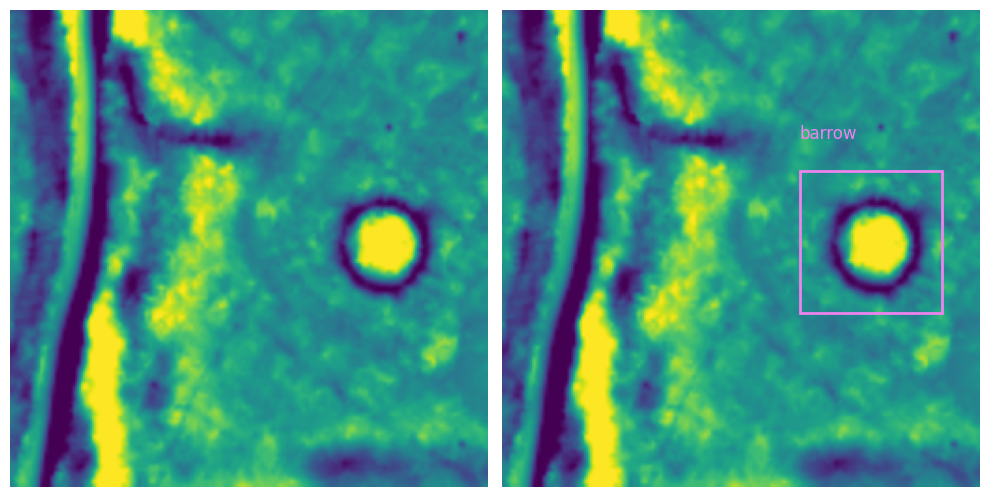

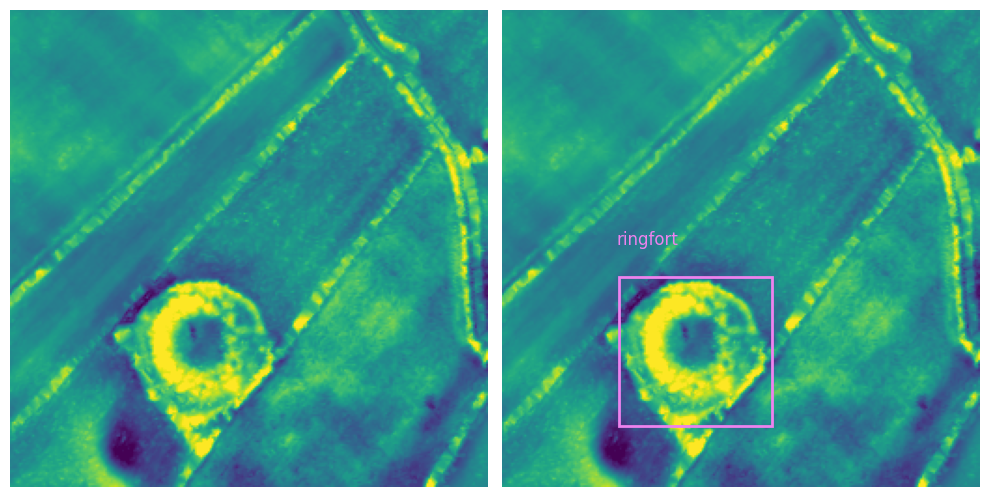

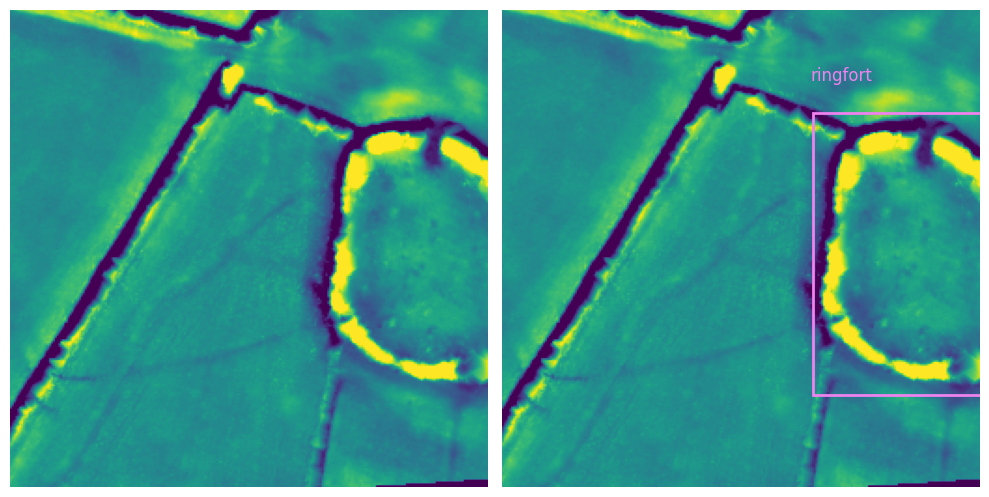

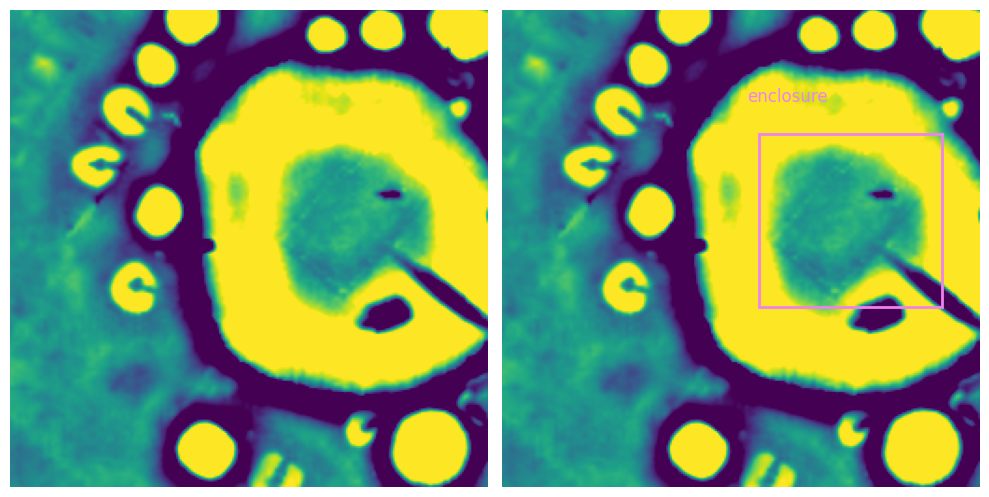

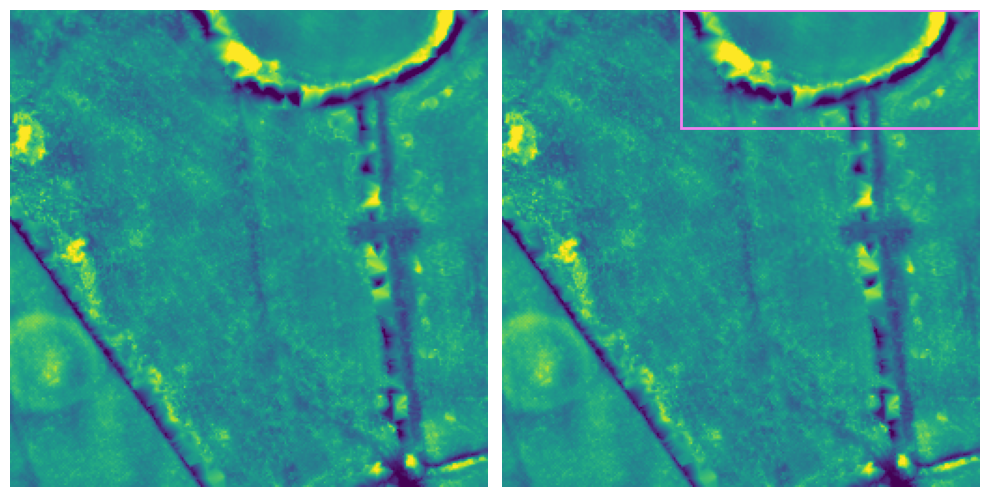

In [2]:
train_dataset_config = {
    "data_dir": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/train/images_SLRM",
    "json_file": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/annotations/samples_256px_SLRM_train.json",
    "hardcode_background": False
}

train_dataset = ObjectDetectionCocoDataset(train_dataset_config)
print(f"Total number of patches: {len(train_dataset)}")
print(f"Labels: {train_dataset.labels}")

train_dataset.show_image(1);
train_dataset.show_image(100);
train_dataset.show_image(1002);
train_dataset.show_image(1009);
train_dataset.show_image(1021);

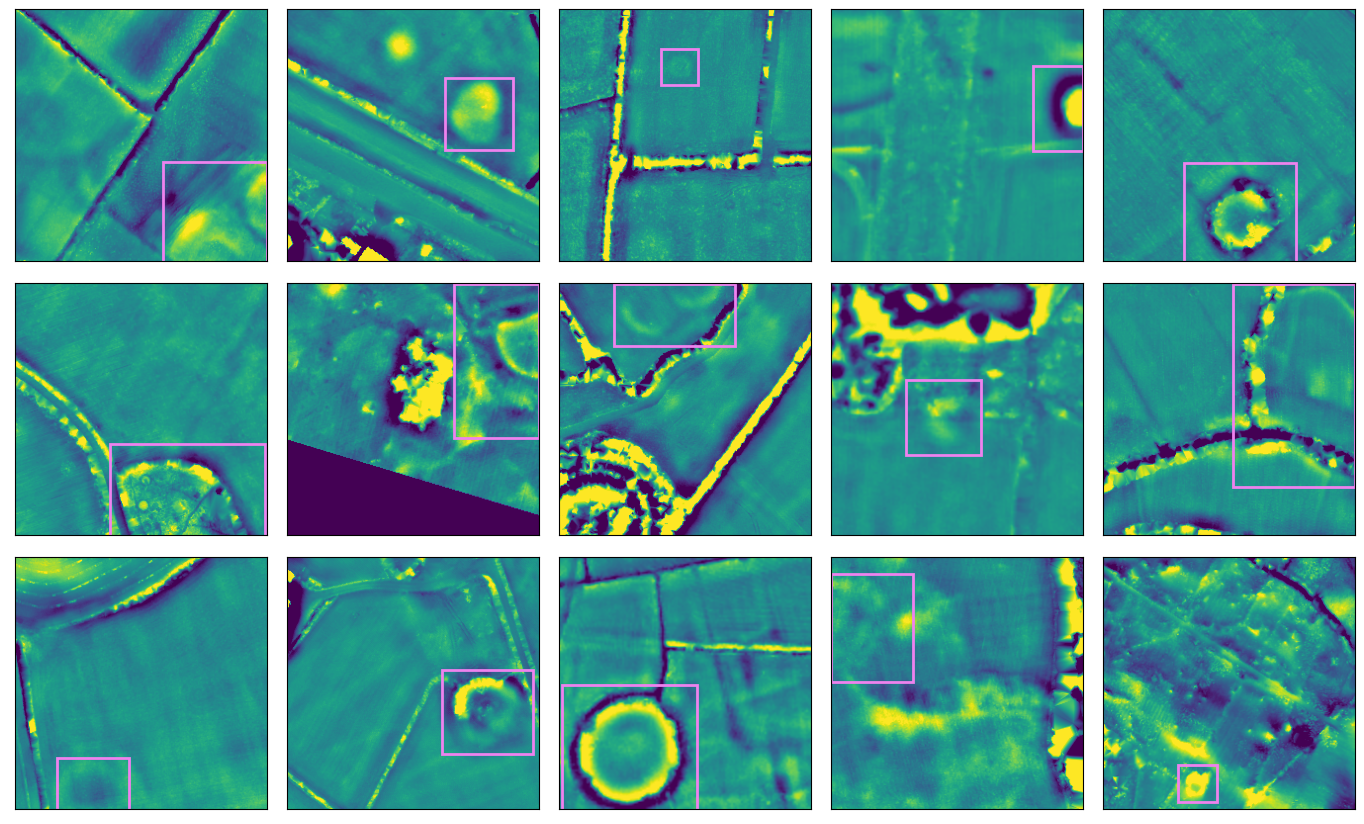

In [3]:
train_dataset.show_batch(15);

In [4]:
train_dataset.data_distribution_table()

Label  Count
0  enclosure   3759
1     barrow   3182
2   ringfort   9882

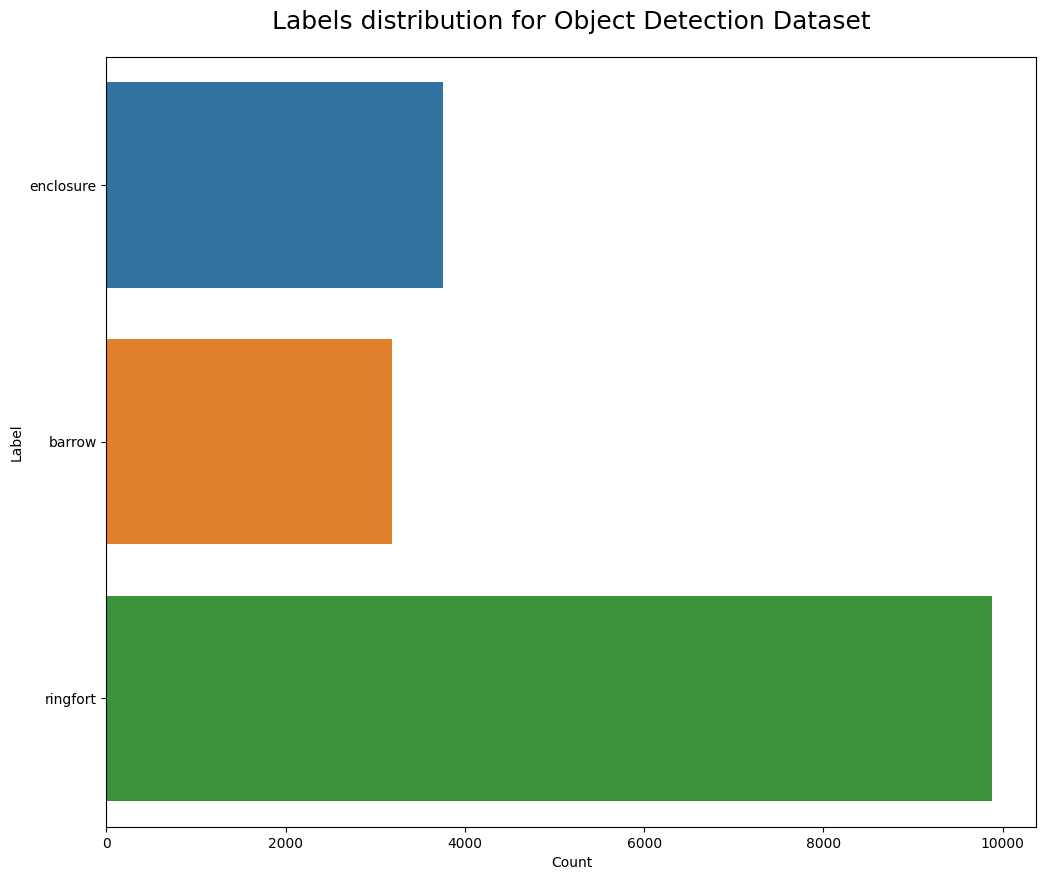

In [5]:
train_dataset.data_distribution_barchart();

## Visualize images and objects witn bounding boxes - validation data

Total number of patches: 3959
Labels: [None, 'enclosure', 'barrow', 'ringfort']


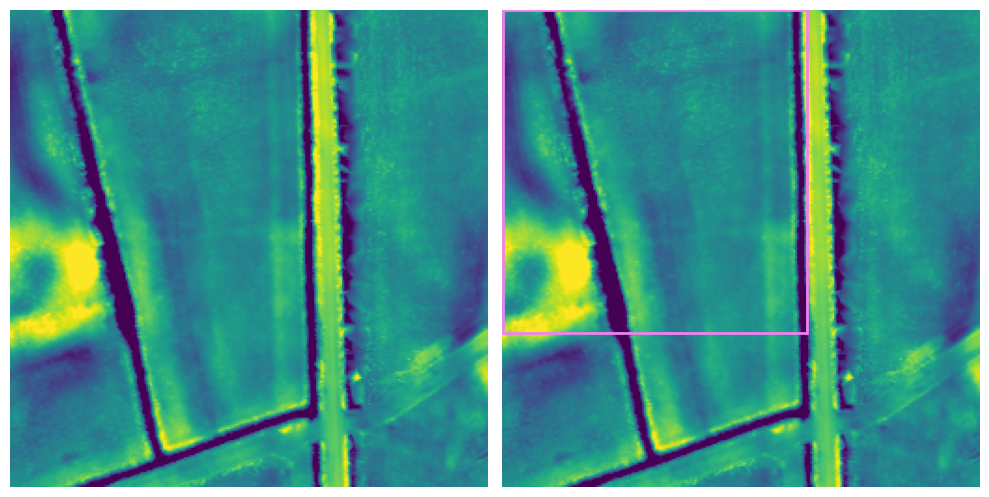

(array([[0.0019069 , 0.00191175, 0.00192021, ..., 0.00196647, 0.00199316,
        0.00207481],
       [0.00185047, 0.001861  , 0.00192608, ..., 0.00197969, 0.00201736,
        0.00221193],
       [0.00189338, 0.0019089 , 0.00188859, ..., 0.00199753, 0.00208537,
        0.0022282 ],
       ...,
       [0.001923  , 0.0019291 , 0.0019294 , ..., 0.00200764, 0.00197117,
        0.00194576],
       [0.00195947, 0.00199573, 0.00201422, ..., 0.00196779, 0.00208896,
        0.00204058],
       [0.00202912, 0.00203953, 0.00197718, ..., 0.00194675, 0.00205314,
        0.00208396]], dtype=float32), {'boxes': tensor([[  0.,   0., 163., 173.]]), 'labels': tensor([3]), 'area': tensor([28199.]), 'iscrowd': tensor([0]), 'image_id': tensor([1010])})


In [6]:
validation_dataset_config = {
    "data_dir": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM",
    "json_file": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/annotations/samples_256px_SLRM_validation.json",
    "hardcode_background": False
}

validation_dataset = ObjectDetectionCocoDataset(validation_dataset_config)
print(f"Total number of patches: {len(validation_dataset)}")
print(f"Labels: {validation_dataset.labels}")

# validation_dataset.show_image(1);
# validation_dataset.show_image(1002);
validation_dataset.show_image(1009);
print(validation_dataset.__getitem__(1009))
# validation_dataset.show_image(1021);
# validation_dataset.show_image(3022);

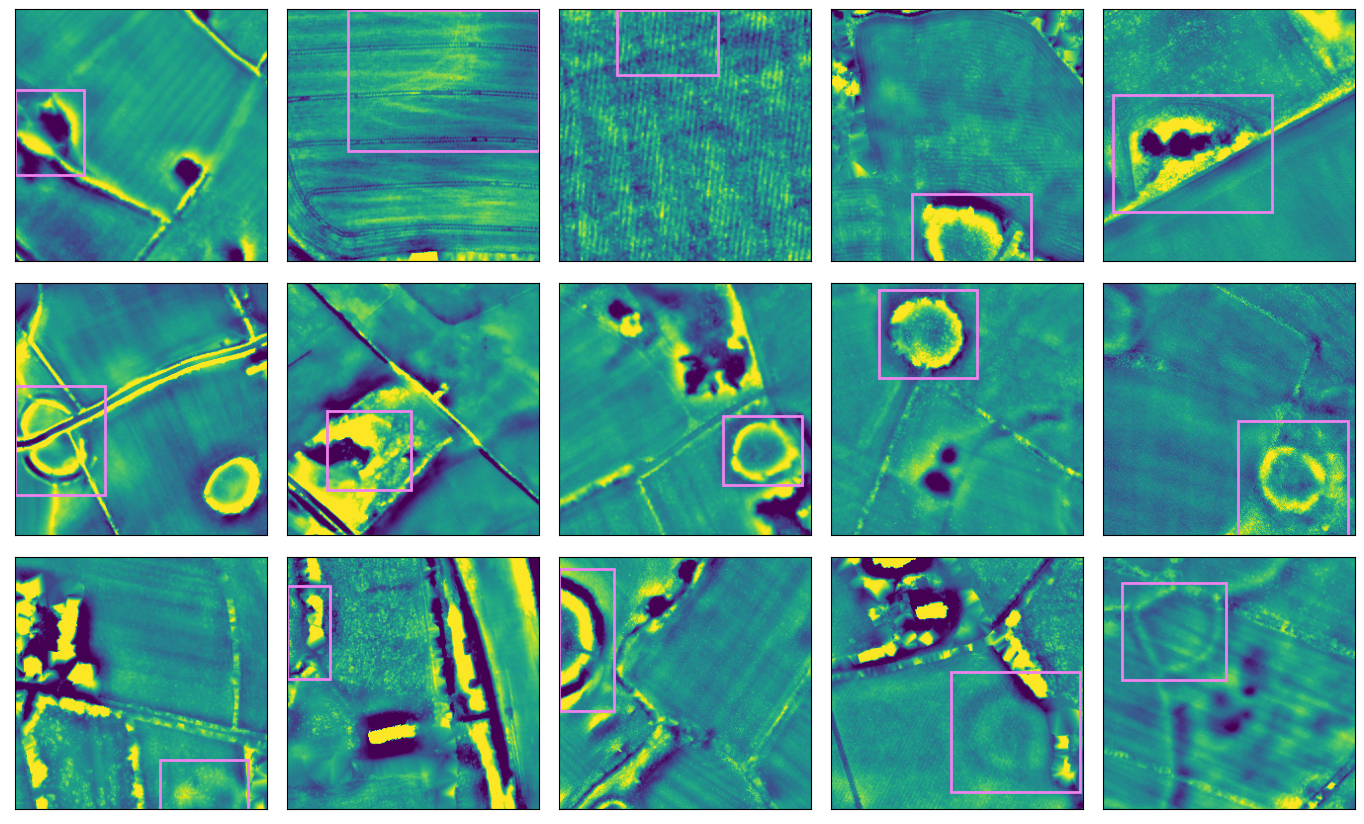

In [7]:
validation_dataset.show_batch(15);

In [8]:
validation_dataset.data_distribution_table()

Label  Count
0  enclosure   1023
1     barrow    656
2   ringfort   2280

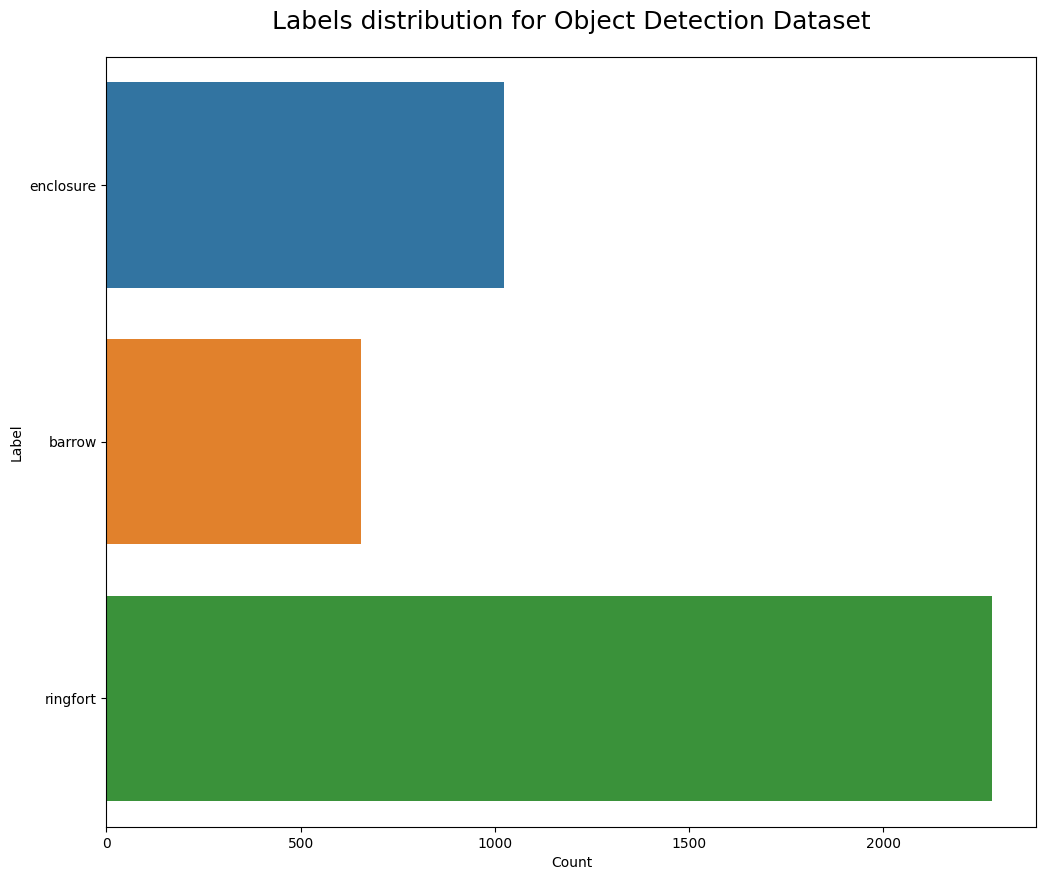

In [9]:
validation_dataset.data_distribution_barchart();

## Predictions

In [10]:
# model_config = {
#     "num_classes": 4,
#     "learning_rate": 0.001,
#     "pretrained": True,
#     "metrics": ["map"]
# }
# model = FasterRCNN(model_config)
# model.prepare()

# model_path = "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar"
# labels = [None, 'enclosure', 'barrow', 'ringfort']

# transform = Resize()
# model.load_model(model_path)


# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/80064_116416__ISA-22_Tralee__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/80064_116416__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)

# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/84480_116992__Noise_Mapping__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/84480_116992__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)

# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/85248_113408__Noise_Mapping__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/85248_113408__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)

# # ch
# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/79936_115392__ISA-22_Tralee__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/79936_115392__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)


# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/87232_117824__ISA-22_Tralee__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/87232_117824__ISA-22_Tralee__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)

# image = image_loader('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM/87232_117824__Noise_Mapping__SLRM.tif')
# true_label = open('/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/labelTxt/87232_117824__Noise_Mapping__labelTxt.txt').readlines()[0].split(' ')[8]
# print(f'True label: {true_label}')
# fig = model.detect_objects(image, labels, transform)


In [2]:
# EVALUATE 

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from aitlas.datasets import ObjectDetectionCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN
import torch
import numpy as np

validation_dataset_config = {
    "data_dir": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/samples_256px/validation/images_SLRM",
    "json_file": "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/data/TII_LIDAR/annotations/samples_256px_SLRM_validation.json",
    "hardcode_background": False,
    "joint_transforms": ["aitlas.transforms.ResizeToTensorV2"]
}

validation_dataset = ObjectDetectionCocoDataset(validation_dataset_config)

model_config = {
    "num_classes": 4,
    "learning_rate": 0.001,
    "pretrained": True,
    "metrics": ["map"]
}
model = FasterRCNN(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar"
model.evaluate(dataset=validation_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2023-01-03 10:58:19,145 INFO Loading checkpoint /Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar
2023-01-03 10:58:20,225 INFO Loaded checkpoint /Users/anakostovska/Dropbox/IrishArcheology/aitlas/experiments/SLRM/checkpoint.pth.tar at epoch 21
testing on test set:   2%|▏         | 1/62 [12:13<12:25:41, 733.47s/it]